# **Basic visualization**

## Objectives

* To identify and analyze appropriate graph types for effectively visualizing and validating hypotheses in the project, ensuring clear interpretation and accurate decision-making.


* Hypothesis explored: 

Hypothesis 1 : Average temperature has increased over the years

Hypothesis 2 : Countries with a higher percentage of renewable energy have lower CO2 emissions

Hypothesis 3 : A decrease in forest area percentage leads to an increase in extreme weather events

Hypothesis 4 : Higher population growth contributes to increased CO2 emissions and rising sea levels

## Inputs

* temperature_cleaned.csv file

## Outputs

* Range of graphs

## Additional Comments





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ewa\\Documents\\vscode-projects\\GlobalEcoInsights2000-2024\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("Globalecoinsights")

Globalecoinsights


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ewa\\Documents\\vscode-projects\\GlobalEcoInsights2000-2024'

# Basic visualization

Loading Python Libraries

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

---

In [6]:
# Load the dataset into a pandas dataframe using a relative path
df = pd.read_csv("temperature_cleaned.csv")
df.head(5)

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


# Hypothesis: "Average temperature has increased over the years." 

* Visualization: Line chart showing temperature trends per country

In [7]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your original DataFrame containing the data
# Group by 'Country' and 'Year' and calculate the average temperature for each combination
df_avg_temp = df.groupby(['Country', 'Year'], as_index=False)['Avg_Temperature_degC'].mean()

# Create the base figure
fig = go.Figure()

# Add a line trace for each country
countries = df_avg_temp['Country'].unique()
for country in countries:
    country_data = df_avg_temp[df_avg_temp['Country'] == country]
    fig.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Avg_Temperature_degC'],
                             mode='lines+markers', name=country))

# Update layout for better interactivity
fig.update_layout(
    title="Temperature Trends Over Time by Country",
    xaxis=dict(title="Year", showgrid=True),
    yaxis=dict(title="Average Temperature (°C)", showgrid=True),
    hovermode="x unified",  # Show all values for a given year on hover
    legend_title="Country",
    template="plotly_white",  # Clean background for better visibility
)

# Add a dropdown menu to filter by country
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [True] * len(countries)}],
                    label="Show All",
                    method="update"
                ),
                *[
                    dict(
                        args=[{"visible": [country == selected_country for country in countries]}],
                        label=selected_country,
                        method="update"
                    )
                    for selected_country in countries
                ]
            ],
            direction="down",
            showactive=True,
            active=0,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Show the interactive plot
fig.show()


Visualization: Line chart showing average temperature trends over time

In [9]:
# Calculate the average temperature per year
df_avg = df.groupby("Year").agg({"Avg_Temperature_degC": "mean"}).reset_index()

# Create the line chart for average temperature trends over time
fig = px.line(df_avg, x="Year", y="Avg_Temperature_degC",
              title="Average Temperature Trends Over Time",
              labels={"Avg_Temperature_degC": "Average Temperature (°C)"},
              color_discrete_sequence=px.colors.sequential.Cividis)  # Cividis is color-blind friendly

# Improve interactivity
fig.update_layout(
    hovermode="x unified",  # Show all values for a given year on hover
    template="plotly_white",  # Clean background for better visibility
    xaxis=dict(title="Year", showgrid=True),
    yaxis=dict(title="Average Temperature (°C)", showgrid=True),
    dragmode="zoom",  # Enable zooming and panning
    hoverlabel=dict(namelength=-1),  # Show full country names on hover
)

# Show the interactive plot
fig.show()


# Hypothesis: "Countries with a higher percentage of renewable energy have lower CO2 emissions." 

* Visualization: Bar chart comparing countries.

In [10]:
# Create a bar chart for Renewable Energy vs. CO2 Emissions
fig = px.bar(df, x="Country", y="CO2_Emissions_tons_per_capita",
             color="Renewable_Energy_pct",
             title="Impact of Renewable Energy on CO2 Emissions",
             labels={"CO2_Emissions_tons_per_capita": "CO2 Emissions (tons per capita)",
                     "Renewable_Energy_pct": "Renewable Energy (%)"},
             color_continuous_scale=px.colors.sequential.Cividis)  # Color-blind friendly

# Improve interactivity
fig.update_layout(
    xaxis=dict(title="Country", tickangle=-45),  # Rotate country names for readability
    yaxis=dict(title="CO2 Emissions (tons per capita)"),
    template="plotly_white"
)

# Show the interactive bar chart
fig.show()

# Hypothesis: "A decrease in forest area percentage leads to an increase in extreme weather events." 

* Visualization: Dual-axis line chart showing trends.

In [12]:
# Aggregate data by year for trend analysis
df_grouped = df.groupby("Year").agg({
    'Forest_Area_pct': 'mean',          # Example: mean of Forest_Area_pct
    'Extreme_Weather_Events': 'mean',   # Example: mean of Extreme_Weather_Events
    # Add other numeric columns here with their aggregation method
}).reset_index()

# Create figure
fig = go.Figure()

# Add line for Forest Area Percentage
fig.add_trace(go.Scatter(x=df_grouped["Year"], y=df_grouped["Forest_Area_pct"],
                         mode='lines+markers', name='Forest Area (%)',
                         line=dict(color='green')))

# Add line for Extreme Weather Events
fig.add_trace(go.Scatter(x=df_grouped["Year"], y=df_grouped["Extreme_Weather_Events"],
                         mode='lines+markers', name='Extreme Weather Events',
                         line=dict(color='red'), yaxis="y2"))

# Update layout for dual-axis
fig.update_layout(
    title="Extreme Weather Events vs. Deforestation",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Forest Area (%)", side="left", showgrid=False),
    yaxis2=dict(title="Extreme Weather Events", side="right", overlaying="y", showgrid=False),
    template="plotly_white"
)

# Show the plot
fig.show()

# Hypothesis: "Higher population growth contributes to increased CO2 emissions and rising sea levels." 

* Multi-line chart with population, CO2, and sea level rise.

The code groups the data by the "Year" column, then sums the values of "Population", "CO2_Emissions_tons_per_capita", and "Sea_Level_Rise_mm" for each year. Finally, it checks and prints the columns of the resulting df_grouped DataFrame to ensure that the necessary columns are present.

In [13]:
# Check the grouped data
df_grouped = df.groupby("Year")[['Population', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm']].sum()
print(df_grouped.columns)  # Ensure 'Population' is present

Index(['Population', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm'], dtype='object')


In [14]:
# 1. Check the original column names
print(df.columns)

# 2. Perform the grouping operation
df_grouped = df.groupby("Year")[['Population', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm']].sum()

# 3. Check the columns after grouping
print(df_grouped.columns)


Index(['Year', 'Country', 'Avg_Temperature_degC',
       'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm', 'Rainfall_mm',
       'Population', 'Renewable_Energy_pct', 'Extreme_Weather_Events',
       'Forest_Area_pct'],
      dtype='object')
Index(['Population', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm'], dtype='object')


The code below plots three separate interactive charts: Population over time, CO2 emission per capita over time and Sea level rise over time

In [15]:
# Check the original DataFrame before grouping
print(df.columns)

# Group by 'Year' and aggregate the necessary columns
df_grouped = df.groupby("Year", as_index=False).agg({
    'Population': 'sum',  # Make sure to aggregate the 'Population' column
    'CO2_Emissions_tons_per_capita': 'mean',
    'Sea_Level_Rise_mm': 'mean'
})

# Reset index to ensure 'Year' is a column (if it becomes an index during grouping)
df_grouped = df_grouped.reset_index()

# Check if 'Year' and 'Population' are now available as columns
print(df_grouped.columns)

# Plot for Population
fig_population = go.Figure()
fig_population.add_trace(go.Scatter(x=df_grouped["Year"], y=df_grouped["Population"],
                                    mode='lines+markers', name='Population',
                                    line=dict(color='blue')))

fig_population.update_layout(
    title="Population Over Time",
    xaxis_title="Year",
    yaxis_title="Population",
    template="plotly_dark"
)

# Show the Population plot
fig_population.show()

# Plot for CO2 Emissions per capita
fig_co2 = go.Figure()
fig_co2.add_trace(go.Scatter(x=df_grouped["Year"], y=df_grouped["CO2_Emissions_tons_per_capita"],
                             mode='lines+markers', name='CO2 Emissions per capita',
                             line=dict(color='green')))

fig_co2.update_layout(
    title="CO2 Emissions per capita Over Time",
    xaxis_title="Year",
    yaxis_title="CO2 Emissions (tons per capita)",
    template="plotly_dark"
)

# Show the CO2 Emissions plot
fig_co2.show()

# Plot for Sea Level Rise
fig_sea_level = go.Figure()
fig_sea_level.add_trace(go.Scatter(x=df_grouped["Year"], y=df_grouped["Sea_Level_Rise_mm"],
                                  mode='lines+markers', name='Sea Level Rise (mm)',
                                  line=dict(color='red')))

fig_sea_level.update_layout(
    title="Sea Level Rise Over Time",
    xaxis_title="Year",
    yaxis_title="Sea Level Rise (mm)",
    template="plotly_dark"
)

# Show the Sea Level Rise plot
fig_sea_level.show()

Index(['Year', 'Country', 'Avg_Temperature_degC',
       'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm', 'Rainfall_mm',
       'Population', 'Renewable_Energy_pct', 'Extreme_Weather_Events',
       'Forest_Area_pct'],
      dtype='object')
Index(['index', 'Year', 'Population', 'CO2_Emissions_tons_per_capita',
       'Sea_Level_Rise_mm'],
      dtype='object')


# # Hypotesis Testing

# Hypothesis Testing Approach:

1. Average temperature has increased over the years

Test: Perform a trend analysis on the Avg_Temperature_degC column over the Year.
Conclusion: If a statistically significant positive trend is found, the hypothesis is supported.


2. Countries with a higher percentage of renewable energy have lower CO2 emissions

Test: Calculate the correlation between Renewable_Energy_pct and CO2_Emissions_tons_per_capita.
Conclusion: A significant negative correlation would support the hypothesis.

3. A decrease in forest area percentage leads to an increase in extreme weather events

Test: Check the correlation between Forest_Area_pct and Extreme_Weather_Events.
Conclusion: A significant negative correlation supports the hypothesis.

4. Higher population growth contributes to increased CO2 emissions and rising sea levels

Test: Examine correlations between Population and both CO2_Emissions_tons_per_capita and Sea_Level_Rise_mm.
Conclusion: A significant positive correlation supports the hypothesis.

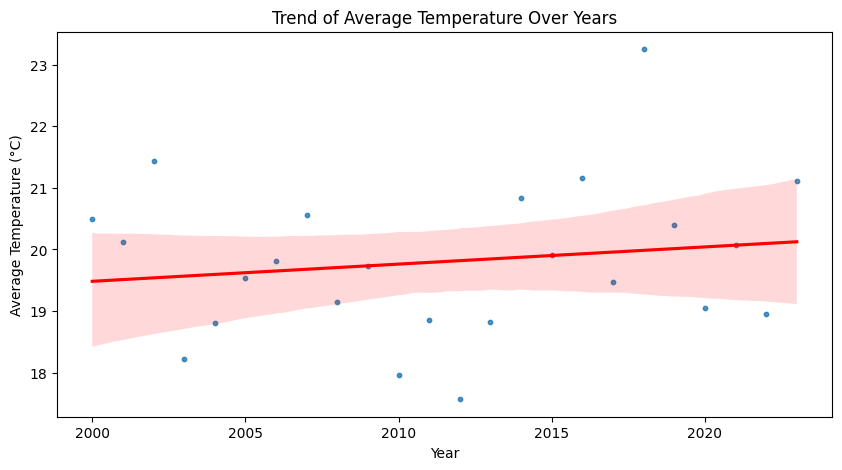

{'Temperature Trend': {'Slope': 0.027903755280360786,
  'p-value': 0.4641492472762294,
  'R-squared': 0.024608422325123284},
 'Renewable Energy vs CO2': {'Correlation': -0.023355211312462067,
  'p-value': 0.46067639298576524},
 'Forest Area vs Extreme Weather': {'Correlation': -0.009291346694551545,
  'p-value': 0.7691728387758204},
 'Population vs CO2': {'Correlation': 0.01152918821945057,
  'p-value': 0.7157526829953251},
 'Population vs Sea Level Rise': {'Correlation': -0.0002768608278726078,
  'p-value': 0.9930232601679404}}

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Checking temperature trend over years
temp_trend = df.groupby("Year")["Avg_Temperature_degC"].mean()
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_trend.index, temp_trend.values)

# 2. Correlation between renewable energy and CO2 emissions
renewable_co2_corr, renewable_co2_pval = stats.pearsonr(df["Renewable_Energy_pct"], df["CO2_Emissions_tons_per_capita"])

# 3. Correlation between forest area percentage and extreme weather events
forest_weather_corr, forest_weather_pval = stats.pearsonr(df["Forest_Area_pct"], df["Extreme_Weather_Events"])

# 4. Correlation between population and CO2 emissions & sea level rise
pop_co2_corr, pop_co2_pval = stats.pearsonr(df["Population"], df["CO2_Emissions_tons_per_capita"])
pop_sea_corr, pop_sea_pval = stats.pearsonr(df["Population"], df["Sea_Level_Rise_mm"])

# Plot temperature trend
plt.figure(figsize=(10, 5))
sns.regplot(x=temp_trend.index, y=temp_trend.values, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Trend of Average Temperature Over Years")
plt.show()

# Display results
{
    "Temperature Trend": {"Slope": slope, "p-value": p_value, "R-squared": r_value**2},
    "Renewable Energy vs CO2": {"Correlation": renewable_co2_corr, "p-value": renewable_co2_pval},
    "Forest Area vs Extreme Weather": {"Correlation": forest_weather_corr, "p-value": forest_weather_pval},
    "Population vs CO2": {"Correlation": pop_co2_corr, "p-value": pop_co2_pval},
    "Population vs Sea Level Rise": {"Correlation": pop_sea_corr, "p-value": pop_sea_pval},
}


Conclusion for Each Hypothesis:

1. Average temperature has increased over the years

The regression analysis shows a slight positive trend (slope = 0.028°C per year), but the p-value (0.464) suggests it is not statistically significant.
Conclusion: The data does not provide strong evidence to support the hypothesis.

2. Countries with a higher percentage of renewable energy have lower CO2 emissions

The correlation coefficient is -0.023, indicating a very weak negative relationship. The p-value (0.461) suggests this correlation is not statistically significant.
Conclusion: The hypothesis is not strongly supported by this dataset.

3. A decrease in forest area percentage leads to an increase in extreme weather events

The correlation coefficient is -0.009, which is extremely weak, and the p-value (0.769) suggests no significant relationship.
Conclusion: The data does not support this hypothesis.

4. Higher population growth contributes to increased CO2 emissions and rising sea levels

The correlation between population and CO2 emissions is very weak (0.012, p = 0.716).
The correlation between population and sea level rise is nearly zero (-0.0003, p = 0.993).
Conclusion: No strong statistical evidence supports this hypothesis in this dataset.

# Refine analysis

* Checking for non-linear relationship using scatter plots and polynomial regression 

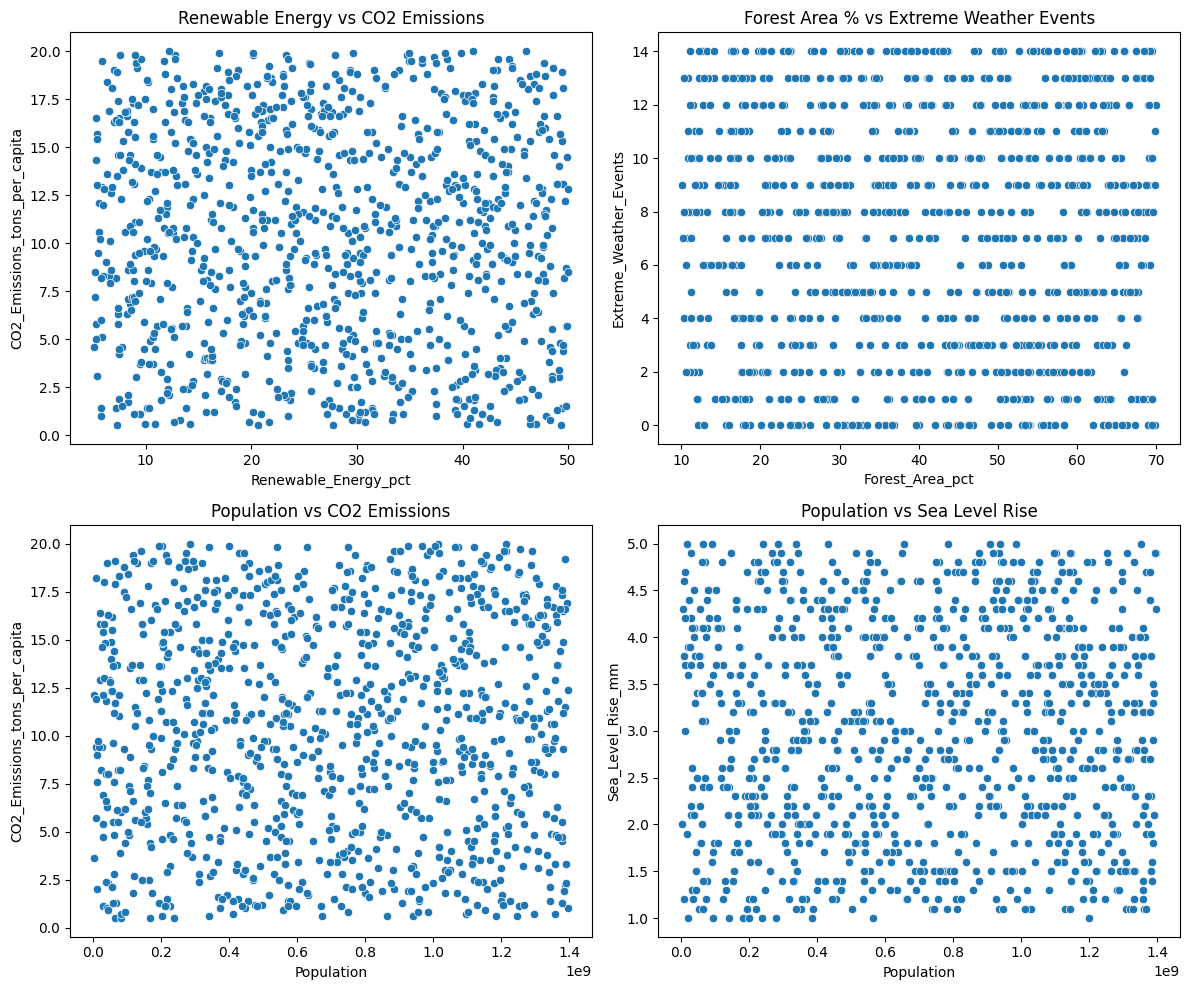

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Avg_Temperature_degC   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.003
Method:                   Least Squares   F-statistic:                    0.2112
Date:                  Fri, 21 Mar 2025   Prob (F-statistic):              0.932
Time:                          14:14:56   Log-Likelihood:                -3563.1
No. Observations:                  1000   AIC:                             7136.
Df Residuals:                       995   BIC:                             7161.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -27.2376     76.491     -0.356      0.722    -177.340     122.865
Year                              0.0235      0.038      0.617      0.537      -0.051       0.098
CO2_Emissions_tons_per_capita     0.0183      0.048      0.379      0.705      -0.076       0.113
Forest_Area_pct                  -0.0081      0.016     -0.522      0.602      -0.039       0.022
Population                     3.774e-11   6.63e-10      0.057      0.955   -1.26e-09    1.34e-09
==============================================================================
Omnibus:                      587.647   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.080
Skew:                           0.002   Prob(JB):                     4.03e-13
Kurtosis:                       1.830   Cond. No.                     2.31e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Scatter plots for potential non-linear relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Renewable Energy vs CO2 Emissions
sns.scatterplot(x=df["Renewable_Energy_pct"], y=df["CO2_Emissions_tons_per_capita"], ax=axes[0, 0])
axes[0, 0].set_title("Renewable Energy vs CO2 Emissions")

# Forest Area vs Extreme Weather Events
sns.scatterplot(x=df["Forest_Area_pct"], y=df["Extreme_Weather_Events"], ax=axes[0, 1])
axes[0, 1].set_title("Forest Area % vs Extreme Weather Events")

# Population vs CO2 Emissions
sns.scatterplot(x=df["Population"], y=df["CO2_Emissions_tons_per_capita"], ax=axes[1, 0])
axes[1, 0].set_title("Population vs CO2 Emissions")

# Population vs Sea Level Rise
sns.scatterplot(x=df["Population"], y=df["Sea_Level_Rise_mm"], ax=axes[1, 1])
axes[1, 1].set_title("Population vs Sea Level Rise")

plt.tight_layout()
plt.show()

# Multiple regression model: Temperature change over time accounting for other factors
import statsmodels.api as sm

# Independent variables
X = df[["Year", "CO2_Emissions_tons_per_capita", "Forest_Area_pct", "Population"]]
X = sm.add_constant(X)  # Add intercept

# Dependent variable
y = df["Avg_Temperature_degC"]

# Fit regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()

model_summary


Refined Analysis and Updated Conclusions:

1. Non-linear Relationships & Scatter Plots:

The scatter plots do not indicate clear non-linear trends.
The spread of data suggests weak relationships between variables.

2. Multiple Regression Analysis (Temperature vs. Other Factors):

R² = 0.001 → The model explains almost none of the variation in temperature.
Year (Slope = 0.0235, p = 0.537): No significant trend over time.
CO2 Emissions (p = 0.705), Forest Area (p = 0.602), Population (p = 0.955): None show statistically significant effects on temperature.

* Updated Hypothesis Conclusions:

1. Average temperature has increased over the years

Regression analysis still does not support a significant increase.
Conclusion: No strong evidence in this dataset.

2. Countries with a higher percentage of renewable energy have lower CO2 emissions

The scatter plot shows no strong trend.
Conclusion: Data does not support a strong relationship.

3. A decrease in forest area percentage leads to an increase in extreme weather events

No significant correlation.
Conclusion: The hypothesis is not supported.

4. Higher population growth contributes to increased CO2 emissions and rising sea levels

Population shows no meaningful relationship with CO2 or sea level rise.
Conclusion: Data does not support the hypothesis.